<a href="https://colab.research.google.com/github/seobbil/Project-Data-Sains-Survival-of-Titanic/blob/main/Projek_Data_Sains_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS KONVERSI MATA KULIAH DATA SAINS
* Nama : Hamidah Nabila Zahra
* NIM : M0122052
* Mata kuliah : Data Sains
* Tujuan dari projek : Prediksi penumpang Titanic yang selamat maupun tidak selamat.


---
Tenggelamnya kapal Titanic adalah salah satu kecelakaan kapal yang paling terkenal dalam sejarah.

Pada tanggal 15 April 1912, dalam pelayaran perdananya, RMS Titanic yang secara luas dianggap “tidak dapat tenggelam” tenggelam setelah menabrak gunung es. Sayangnya, tidak ada cukup sekoci untuk semua orang di kapal, yang mengakibatkan kematian 1502 dari 2.224 penumpang dan awak kapal.

Meskipun ada unsur keberuntungan yang terlibat dalam bertahan hidup, tampaknya beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain.

Tantangan : model prediktif yang dapat menjawab pertanyaan: “orang seperti apa yang lebih mungkin untuk selamat?” dengan menggunakan data penumpang (misalnya nama, usia, jenis kelamin, kelas sosial-ekonomi, dan lain-lain).

 Keterangan Kolom
- **PassengerId** = Id Penumpang
- **Survived** = 0 = No (Meninggal), 1 = Yes (Hidup)
- **pclass**: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- **Name** = Nama dari setiap penumpang
- **Sex** = Jenis Kelamin Penumpang
- **Age** = Umur dari penumpang
- **Fare** = Tarif
- **Sibsp of siblings / spouses** = Jumlah saudara atau Pasangan
- **Parch**: of parents / children= Jumlah Orang tua atau anak
- **Ticket**: Ticket number
- **Cabin**: Cabin number = Nomor Kamar di kapal
- **Embarked**:Port of Embarkation / Pelabuhan Pemberangkatan
1. C = Cherbourg,
2. Q = Queenstown,
3. S = Southampton




# Import Library

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')
data ="drive/MyDrive/Titanic Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Wrangling

## 1. Gathering (Mengumpulkan data)



In [178]:
df_train = pd.read_csv(data + 'train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
df_test = pd.read_csv(data + 'test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [180]:
df_gendersub = pd.read_csv(data + 'gender_submission.csv')
df_gendersub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 2. Assesing


### train.csv

In [181]:
# Informasi kolom dan tipe data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
#Deskripsi statistik
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [183]:
#Mengecek baris dan kolom
df_train.shape

(891, 12)

In [184]:
#Mengecek duplikat
df_train.duplicated().sum()

0

In [185]:
#Mengecek missing value
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [186]:
numerik = ['Fare', "Age"]
kategorik = ['Survived' , "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

train_numerik = df_train[numerik]
train_kategorik = df_train[kategorik]

In [187]:
# Identifikasi data numerik
train_numerik.head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [188]:
# Identifikasi data kategorik
train_kategorik.head()

,Survived,Sex,Pclass,Embarked,SibSp,Parch
0,0,male,3,S,1,0
1,1,female,1,C,1,0
2,1,female,3,S,0,0
3,1,female,1,S,1,0
4,0,male,3,S,0,0


### Menggabungkan data train dan test

In [189]:
data = pd.concat([df_train, df_test], ignore_index=True)

In [190]:
data.shape

(1309, 12)

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [192]:
data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [193]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [194]:
df_train[df_train['Cabin'].isnull() == False].value_counts('Survived')


,count
Survived,
1,136
0,68


### test.csv

In [195]:
# Informasi kolom dan tipe data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [196]:
#Deskripsi statistik
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
#Mengecek baris dan kolom
df_test.shape

(418, 11)

In [198]:
#Mengecek duplikat
df_test.duplicated().sum()

0

In [199]:
#Mengecek missing value
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [200]:
numerik = ['Fare', "Age"]
kategorik = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]

test_numerik = df_test[numerik]
test_kategorik = df_test[kategorik]

In [201]:
# Identifikasi data numerik
test_numerik.head()

,Fare,Age
0,7.8292,34.5
1,7.0000,47.0
2,9.6875,62.0
3,8.6625,27.0
4,12.2875,22.0


In [202]:
# Identifikasi data kategorik
test_kategorik.head()

,Sex,Pclass,Embarked,SibSp,Parch
0,male,3,Q,0,0
1,female,3,S,1,0
2,male,2,Q,0,0
3,male,3,S,0,0
4,female,3,S,1,1


## 3. Cleaning

In [203]:
df_train.shape

(891, 12)

In [204]:
df_test.shape

(418, 11)

#### Kolom Embarked

In [205]:
# Mengecek letak missing value terletak di indeks ke berapa
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [206]:
# Mengisi missing value train.csv Embarked dengan modus
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [207]:
# Mengecek missing value train.csv lagi setelah mengisi missing value
df_train['Embarked'].isnull().sum()

0

In [208]:
# Mengecek baris train.csv indeks ke 61 (letak null pada Embarked)
df_train.loc[61]

,61
PassengerId,62
Survived,1
Pclass,1
Name,"Icard, Miss. Amelie"
Sex,female
Age,38.0
SibSp,0
Parch,0
Ticket,113572
Fare,80.0


In [209]:
# Mengakses baris train.csv indeks ke 829 (letak null)
df_train.loc[829]

,829
PassengerId,830
Survived,1
Pclass,1
Name,"Stone, Mrs. George Nelson (Martha Evelyn)"
Sex,female
Age,62.0
SibSp,0
Parch,0
Ticket,113572
Fare,80.0


#### Kolom Age

##### train.csv

In [210]:
# Mengecek rata-rata umur pada train.csv
mean_age_train = df_train.Age.mean()
mean_age_train

29.69911764705882

In [211]:
# Mengisi missing value age dengan rata-rata umur df train.csv
df_train['Age'] = df_train["Age"].fillna(mean_age_train)

##### test.csv

In [212]:
# Mengecek rata-rata umur pada test.csv
mean_age_test = df_test.Age.mean()
mean_age_test

30.272590361445783

In [213]:
# Mengisi missing value age dengan rata-rata umur df test.csv
df_test['Age'] = df_test["Age"].fillna(mean_age_test)

#### Kolom Fare

In [214]:
# Mengecek rata-rata fare pada test.csv
mean_fare_test = df_test.Fare.mean()
mean_fare_test

35.627188489208635

In [215]:
# Mengisi missing value age dengan rata-rata umur df test.csv
df_test['Fare'] = df_test["Fare"].fillna(mean_fare_test)

#### Hapus Kolom Cabin (terlalu banyak missing value)

In [216]:
df_train = df_train.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1 )

In [217]:
# Mengecek missing value lagi setelah cleaning
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [218]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


# Exploratory Data Analysis (EDA)

In [219]:
df_train['Sex'].value_counts()

,count
Sex,
male,577
female,314


<ipython-input-220-8eb3cf499ac5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=gender_counts.index, y=gender_counts.values, palette="inferno")


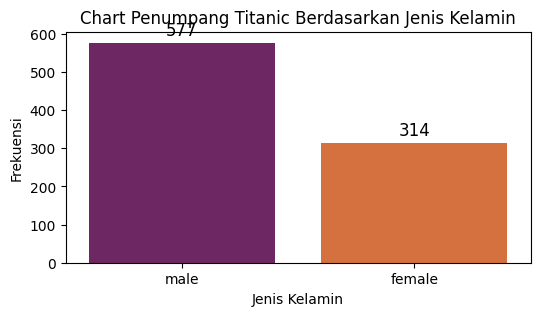

In [220]:
# Menghitung frekuensi tiap jenis kelamin
gender_counts = df_train['Sex'].value_counts()

# Membuat barchart
plt.figure(figsize=(6, 3))
sn.barplot(x=gender_counts.index, y=gender_counts.values, palette="inferno")
plt.title('Chart Penumpang Titanic Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

Interpretasi : Barchart di atas menunjukkan jumlah penumpang pada data frame train berdasarkan jenis kelamin. Di mana 577 orang berjenis kelamin laki-laki dan 314 berjenis kelamin perempuan.

<ipython-input-221-417b4b77eef6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=survived_counts.index, y=survived_counts.values, palette="inferno")


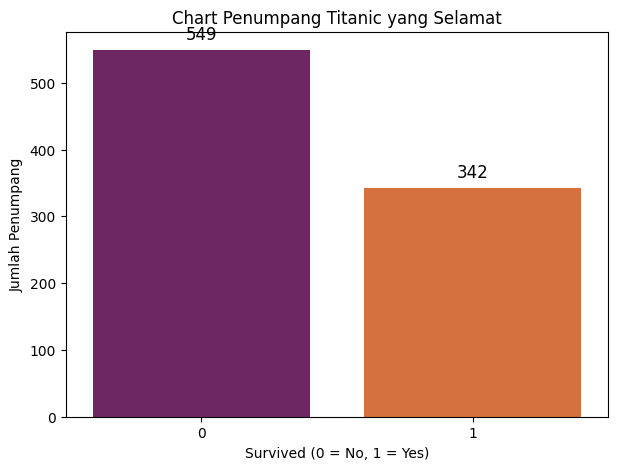

In [221]:
# Membuat barchart untuk survived
survived_counts = df_train['Survived'].value_counts()

plt.figure(figsize=(7, 5))
sn.barplot(x=survived_counts.index, y=survived_counts.values, palette="inferno")
plt.title('Chart Penumpang Titanic yang Selamat')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Jumlah Penumpang')
for i, count in enumerate(survived_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

Interpretasi : jumlah penumpang yang selamat pada data frame train adalah 549 orang dan yang tidak selamat adalah 342 orang.

<ipython-input-222-3285f497ef74>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=embarked_counts.index, y=embarked_counts.values, palette="inferno")


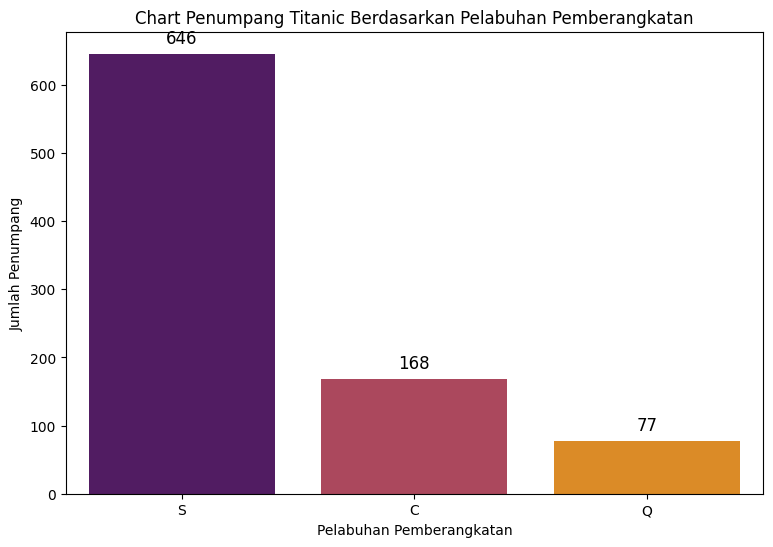

In [222]:
# Membuat barchart untuk embarked
embarked_counts = df_train['Embarked'].value_counts()

plt.figure(figsize=(9, 6))
sn.barplot(x=embarked_counts.index, y=embarked_counts.values, palette="inferno")
plt.title('Chart Penumpang Titanic Berdasarkan Pelabuhan Pemberangkatan')
plt.xlabel('Pelabuhan Pemberangkatan')
plt.ylabel('Jumlah Penumpang')
for i, count in enumerate(embarked_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

Interpretasi : Jumlah penumpang berdasarkan pelabuhan pemberangkatannya. Paling banyak berasal dari pelabuhan Southampton yaitu 646 orang. Kemudian dari pelabuhan Cherbourg ada 168 orang. Paling sedikit dari pelabuhan Queenstown ada 77 orang.

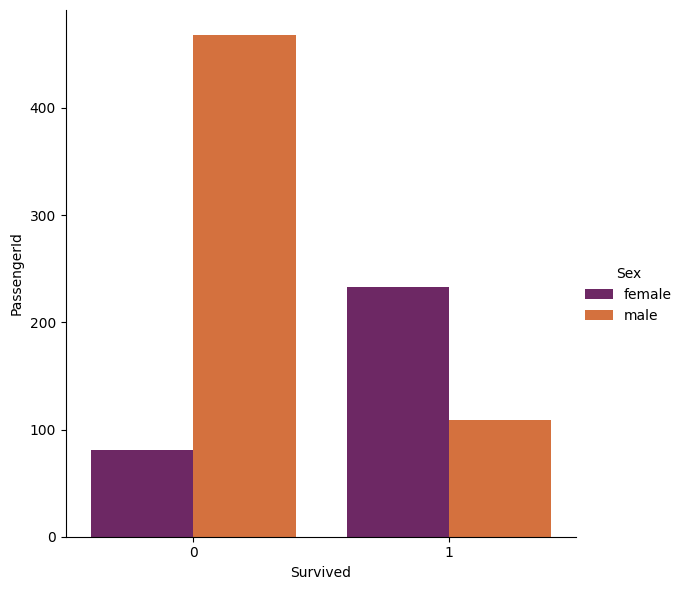

In [223]:
def grouped_barchart(column):
    # Mengelompokkan data berdasarkan 'Survived' dan 'column', lalu menghitung jumlah 'PassengerId'
    survived = df_train.pivot_table(index='Survived', columns=column, values='PassengerId', aggfunc='count').reset_index().melt(id_vars='Survived', value_name='PassengerId')

    # Membuat plot menggunakan sns.catplot
    sn.catplot(
        data=survived, kind="bar",
        x="Survived", y="PassengerId", hue=column,
        palette="inferno", height=6
    )
grouped_barchart("Sex")


Interpretasi :
* Perempuan memiliki tingkat keselamatan yang lebih tinggi - lebih banyak yang selamat dibanding yang tidak selamat
* Laki-laki memiliki tingkat kematian yang sangat tinggi - jumlah yang tidak selamat jauh lebih besar dibanding yang selamat
* Secara total, lebih banyak penumpang yang tidak selamat dibandingkan yang selamat
* Ada kemungkinan prosedur "women and children first" diterapkan dalam proses evakuasi

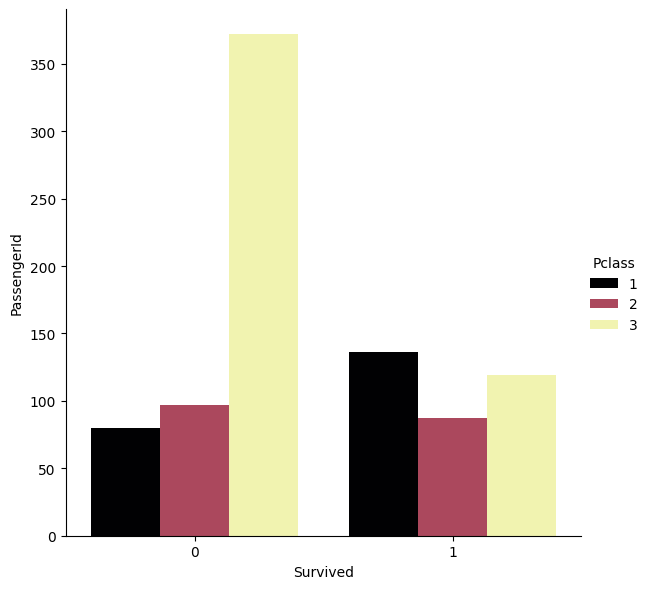

In [224]:
grouped_barchart("Pclass")

Interpretasi :
1. Kelas tiket memiliki korelasi kuat dengan tingkat keselamatan:
  * Penumpang kelas 1 memiliki tingkat keselamatan tertinggi
  * Penumpang kelas 3 memiliki tingkat kematian tertinggi
2. Kemungkinan penyebab:
  * Lokasi kabin kelas 1 mungkin lebih dekat dengan sekoci penyelamat
  * Akses ke dek penyelamatan mungkin lebih mudah untuk kelas atas
  * Informasi dan panduan evakuasi mungkin lebih baik untuk kelas atas
3. Ketimpangan sosial terlihat dari hasil visualisasi data di atas dimana status ekonomi (yang tercermin dari kelas tiket) berpengaruh signifikan terhadap kesempatan bertahan hidup.

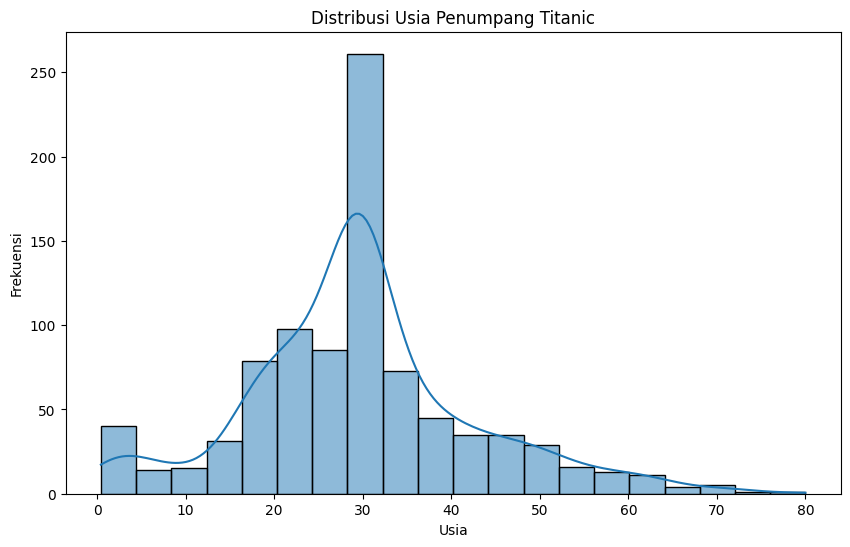

In [225]:
# Histogram untuk Age
plt.figure(figsize=(10, 6))
sn.histplot(df_train['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Penumpang Titanic')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Interpretasi :

1. Distribusi Usia:
  * Mayoritas penumpang berusia antara 20-40 tahun
  * Puncak distribusi ada di sekitar usia 30 tahun dengan sekitar 250 penumpang
  * Ada jumlah yang signifikan untuk usia muda (0-10 tahun), sekitar 40 penumpang
  * Jumlah penumpang menurun secara bertahap setelah usia 40 tahun sehingga sangat sedikit penumpang berusia di atas 70 tahun
2. Karakteristik Distribusi:
  * Distribusi cenderung miring ke kanan (right-skewed)
  * Tidak sepenuhnya simetris seperti kurva normal ideal
  * Ada beberapa puncak kecil (multimodal), terutama di rentang usia muda
3. Titanic membawa penumpang dari berbagai kelompok usia
Dominasi usia produktif (20-40 tahun) mungkin mencerminkan tren imigrasi masa itu.
4. Jumlah anak-anak dan lansia yang relatif sedikit mungkin mencerminkan kesulitan perjalanan laut jarak jauh pada masa itu.


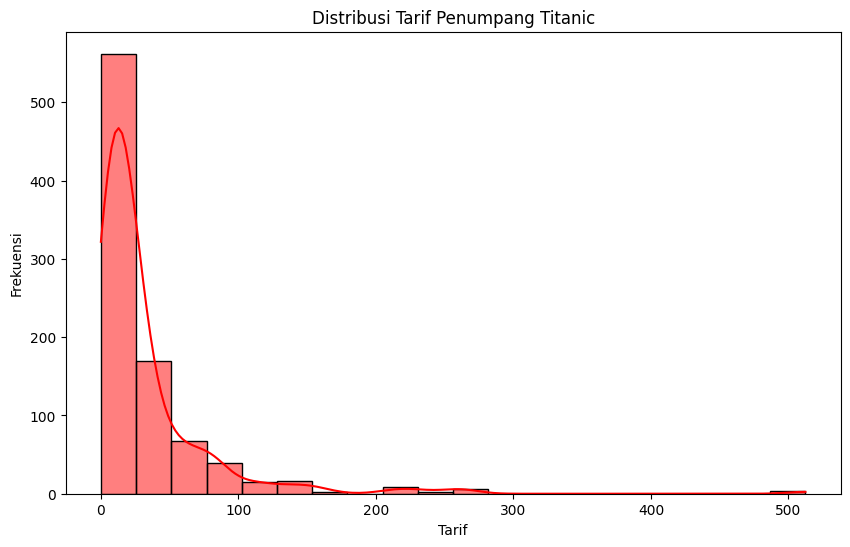

In [226]:
# Histogram untuk Fare
plt.figure(figsize=(10, 6))
sn.histplot(df_train['Fare'], bins=20, kde=True, color='red')
plt.title('Distribusi Tarif Penumpang Titanic')
plt.xlabel('Tarif')
plt.ylabel('Frekuensi')
plt.show()

Interpretasi :
1. Distribusi Tarif:
  * Mayoritas besar penumpang (>500) membayar tarif rendah (0-50)
  * Sekitar 170 penumpang membayar tarif antara 50-100
  * Frekuensi menurun tajam setelah tarif 100
  * Sangat sedikit penumpang membayar tarif di atas 200
  * Ada beberapa penumpang yang membayar tarif sangat tinggi (>400)
2. Karakteristik Distribusi:
  * Distribusi sangat miring ke kanan (heavily right-skewed)
  * Tidak normal/tidak simetris
  * Memiliki "ekor panjang" ke kanan, menunjukkan adanya beberapa tiket dengan harga sangat mahal
3. Grafik mencerminkan ketimpangan sosial-ekonomi yang tajam di antara penumpang
4. Mayoritas penumpang adalah kelas ekonomi dengan tiket murah
5. Adanya kelompok kecil penumpang kaya yang membayar tarif sangat mahal
6. Struktur harga menunjukkan segmentasi kelas yang jelas pada kapal Titanic
7. Pola ini konsisten dengan sejarah Titanic yang mengangkut campuran penumpang dari berbagai kelas sosial, dari imigran hingga orang-orang kaya

               Age      Fare  Survived
Age       1.000000  0.091566 -0.069809
Fare      0.091566  1.000000  0.257307
Survived -0.069809  0.257307  1.000000


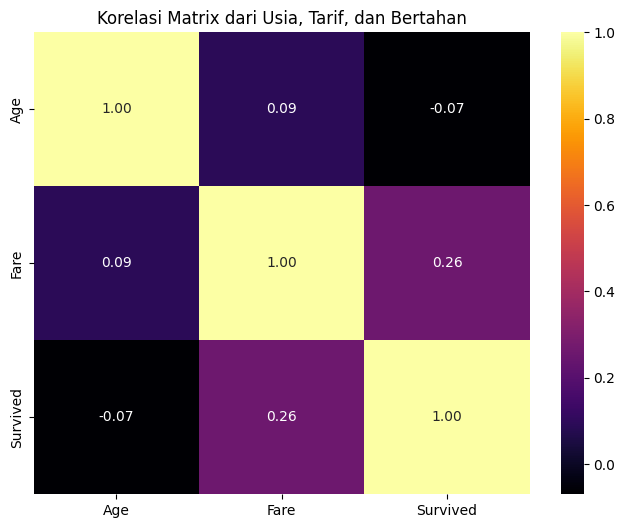

In [227]:
# Kolerasi antara umur, fare, dan survived
correlation_matrix = df_train[['Age', 'Fare', 'Survived']].corr()
print(correlation_matrix)

# Heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Korelasi Matrix dari Usia, Tarif, dan Bertahan')
plt.show()

Interpretasi nilai korelasi:
1. Antara Usia dan Tarif (0.09):
   - Korelasi sangat lemah positif
   - Artinya hampir tidak ada hubungan antara usia penumpang dan tarif yang dibayar
   - Menunjukkan bahwa penumpang dari berbagai usia bisa membeli tiket dari berbagai kelas harga

2. Antara Usia dan Status Bertahan (-0.07):
   - Korelasi sangat lemah negatif
   - Menunjukkan bahwa usia memiliki sedikit pengaruh negatif terhadap kemungkinan bertahan hidup
   - Mungkin mengindikasikan bahwa penumpang yang lebih tua sedikit lebih kecil kemungkinannya untuk selamat

3. Antara Tarif dan Status Bertahan (0.26):
   - Korelasi lemah positif
   - Ini adalah korelasi terkuat di antara ketiga variabel
   - Menunjukkan bahwa semakin tinggi tarif tiket, sedikit lebih tinggi kemungkinan untuk selamat
   - Konsisten dengan fakta bahwa penumpang kelas atas memiliki akses lebih baik ke sekoci penyelamat

Kesimpulan penting:
1. Tarif tiket memiliki pengaruh paling signifikan terhadap kelangsungan hidup, meskipun korelasinya tetap tergolong lemah
2. Usia memiliki pengaruh yang sangat minimal terhadap kelangsungan hidup
3. Tidak ada hubungan yang berarti antara usia dan tarif tiket
4. Faktor-faktor lain yang tidak ditampilkan dalam matriks ini (seperti jenis kelamin atau kelas kabin) mungkin memiliki korelasi yang lebih kuat dengan kelangsungan hidup

# Preprocessing

## Konversi data kategorik ke numerik

In [228]:
# Konversi kolom jenis kelamin ke numerik dengan male = 0 dan female =1
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

In [229]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [230]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [231]:
# Konversi Embarked train.csv
embarked = df_train[['Embarked']]
dummies = pd.get_dummies(embarked)

In [232]:
dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [233]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [234]:
df_train = pd.merge(df_train.reset_index(),  dummies.reset_index())
df_train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,False,False,True
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,True,False,False
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,False,False,True
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,False,False,True


In [235]:
df_train = df_train.drop(["index",'Embarked'], axis =1 )

In [236]:
# Konversi Embarked test.csv
embarked_test = df_test[['Embarked']]
dummies_test = pd.get_dummies(embarked_test)

In [237]:
df_test = pd.merge(df_test.reset_index(),  dummies_test.reset_index())
df_test = df_test.drop(['index', 'Embarked'], axis = 1 )
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,False,True


## Ekstrak Awalan dari Nama dan Ubah Awalan

In [238]:
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [239]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

df_train['Title'] = df_train['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].map(title_mapping)

In [240]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True,0


In [241]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,False,True,False,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,False,True,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,False,True,False,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,False,True,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,False,True,2


## Menghapus kolom yang tidak digunakan dalam pemodelan

Akan dihapus kolom Nama, ID penumpang dan Ticket. Karena data tersebut tidak dapat diubah ke nilai numerik.

In [242]:
df_train = df_train.drop(["PassengerId",'Name', "Ticket"], axis = 1)
df_test = df_test.drop(["PassengerId",'Name' , "Ticket"], axis = 1 )

In [243]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,0,22.0,1,0,7.2500,False,False,True,0
1,1,1,1,38.0,1,0,71.2833,True,False,False,2
2,1,3,1,26.0,0,0,7.9250,False,False,True,1
3,1,1,1,35.0,1,0,53.1000,False,False,True,2
4,0,3,0,35.0,0,0,8.0500,False,False,True,0


In [244]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,False,True,False,0
1,3,1,47.0,1,0,7.0000,False,False,True,2
2,2,0,62.0,0,0,9.6875,False,True,False,0
3,3,0,27.0,0,0,8.6625,False,False,True,0
4,3,1,22.0,1,1,12.2875,False,False,True,2


# Modelling

In [245]:
df_train.shape, df_test.shape

((891, 11), (418, 10))

In [246]:
# Import modul
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [247]:
train_data = df_train.drop("Survived",axis = 1 )
target = df_train['Survived']

In [248]:
# Menggunakan Logistic Regression sebagai classifier
clf = LogisticRegression(max_iter=1000, random_state=0)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.7877095  0.79775281 0.82022472 0.83146067 0.83146067]
Rata-rata skor: 0.8137
Standar deviasi skor: 0.0179


In [249]:
# Menggunakan Gaussian sebagai classifier
clf = GaussianNB()

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]
Rata-rata skor: 0.7991
Standar deviasi skor: 0.0197


In [250]:
# Menggunakan Decision Tree sebagai classifier
clf = DecisionTreeClassifier(random_state=0)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.74301676 0.79213483 0.78089888 0.78089888 0.76966292]
Rata-rata skor: 0.7733
Standar deviasi skor: 0.0167


In [251]:
# Menggunakan Random Forest sebagai classifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.82122905 0.79775281 0.83707865 0.78651685 0.80337079]
Rata-rata skor: 0.8092
Standar deviasi skor: 0.0179


In [252]:
# Menggunakan XGBoost sebagai classifier
clf = xgb.XGBClassifier(n_estimators=100)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.83240223 0.79213483 0.85393258 0.83146067 0.79213483]
Rata-rata skor: 0.8204
Standar deviasi skor: 0.0244


In [253]:
# Menggunakan Neural Networks sebagai classifier
clf = clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.7877095  0.80337079 0.82022472 0.81460674 0.83146067]
Rata-rata skor: 0.8115
Standar deviasi skor: 0.0149


In [254]:
# Menggunakan Gradient Boosting Machines sebagai classifier
clf = GradientBoostingClassifier(n_estimators=100)

# Membuat objek KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Menentukan skor untuk evaluasi
scoring = 'accuracy'

# Menjalankan cross-validation
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)

# Menampilkan hasil skor per lipatan dan rata-rata
print(f"Skor per lipatan: {score}")
print(f"Rata-rata skor: {np.mean(score):.4f}")
print(f"Standar deviasi skor: {np.std(score):.4f}")

Skor per lipatan: [0.83798883 0.81460674 0.84831461 0.83707865 0.80337079]
Rata-rata skor: 0.8283
Standar deviasi skor: 0.0166


In [255]:
# Data dari output cross_val_score
scores = {
    'Logistic Regression': 0.8137,
    'GaussianNB': 0.7991,
    'Decision Tree': 0.7733,
    'Random Forest': 0.8092,
    'XGBoost': 0.8204,
    'Neural Networks': 0.8159,
    'Gradient Boosting Machines': 0.8283
}


df_scores = pd.DataFrame(list(scores.items()), columns=['Classifier', 'Mean Accuracy'])
df_scores

,Classifier,Mean Accuracy
0,Logistic Regression,0.8137
1,GaussianNB,0.7991
2,Decision Tree,0.7733
3,Random Forest,0.8092
4,XGBoost,0.8204
5,Neural Networks,0.8159
6,Gradient Boosting Machines,0.8283


# Prediction

In [256]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,0,34.5,0,0,7.8292,False,True,False,0
1,3,1,47.0,1,0,7.0000,False,False,True,2
2,2,0,62.0,0,0,9.6875,False,True,False,0
3,3,0,27.0,0,0,8.6625,False,False,True,0
4,3,1,22.0,1,1,12.2875,False,False,True,2


In [257]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(train_data, target)

GradientBoostingClassifier()

In [258]:
prediction = clf.predict(df_test)

In [259]:
# # Membuat DataFrame untuk hasil prediksi
submission = pd.DataFrame({'PassengerId': df_gendersub['PassengerId'], 'Survived': prediction})
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [261]:
# Save DataFrame ke dalam bentuk CSV
submission.to_csv('submission.csv', index=False)

In [262]:
df_test['Survived'] = submission['Survived']
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived
0,3,0,34.5,0,0,7.8292,False,True,False,0,0
1,3,1,47.0,1,0,7.0000,False,False,True,2,0
2,2,0,62.0,0,0,9.6875,False,True,False,0,0
3,3,0,27.0,0,0,8.6625,False,False,True,0,0
4,3,1,22.0,1,1,12.2875,False,False,True,2,1


# Additional

In [265]:
survival_by_gender = df_test.groupby('Sex')['Survived'].sum()
survival_by_gender

,Survived
Sex,
0,19
1,120


In [266]:
survival_by_class = df_test.groupby('Pclass')['Survived'].sum()
survival_by_class

,Survived
Pclass,
1,59
2,32
3,48


In [267]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)
survival_by_age = df_test.groupby('AgeGroup')['Survived'].sum()

print("Survival Count by Age Group:")
print(survival_by_age)

survival_by_sex_and_age = df_test.groupby(['Sex', 'AgeGroup'])['Survived'].sum()
print("\nSurvival Count by Sex and Age Group:")
survival_by_sex_and_age

Survival Count by Age Group:
AgeGroup
0-9      17
10-19    20
20-29    31
30-39    39
40-49    15
50-59    10
60-69     6
70+       1
Name: Survived, dtype: int64

Survival Count by Sex and Age Group:


<ipython-input-267-12374f3953c1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df_test.groupby('AgeGroup')['Survived'].sum()
<ipython-input-267-12374f3953c1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex_and_age = df_test.groupby(['Sex', 'AgeGroup'])['Survived'].sum()


Sex  AgeGroup
0    0-9          9
     10-19        3
     20-29        0
     30-39        3
     40-49        3
     50-59        1
     60-69        0
     70+          0
1    0-9          8
     10-19       17
     20-29       31
     30-39       36
     40-49       12
     50-59        9
     60-69        6
     70+          1
Name: Survived, dtype: int64